In [4]:
import numpy as np
import matplotlib.pyplot as mp
import datetime as dt
import matplotlib.dates as md

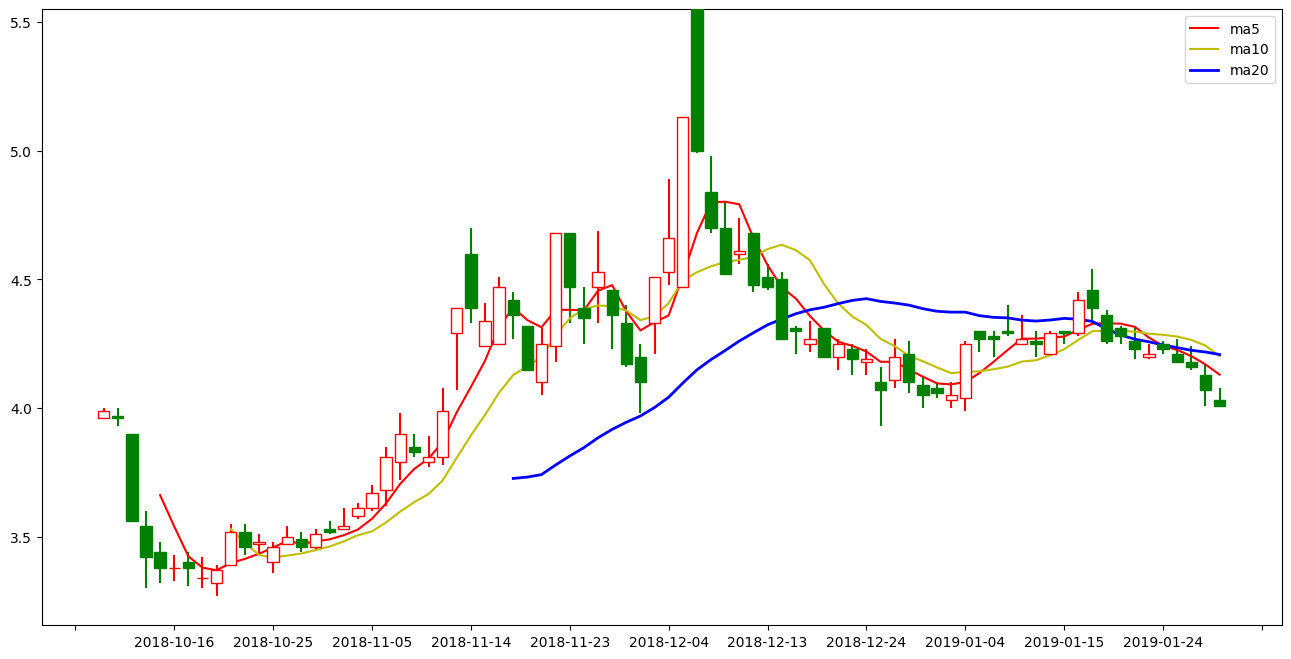

In [7]:
def ma(n, array):
    ma = np.full(array.shape, np.nan)
    for i in range(len(array)):
        if i >= n - 1:
            sum = 0
            for j in range(n):
                sum += array[i - j]
            ma[i] = sum / n
    return ma


def changeDate(dmy):
    dmy = str(dmy, encoding='utf-8')
    ti = dt.datetime.strptime(dmy, '%Y%m%d').date()
    t = ti.strftime('%Y-%m-%d')
    return t

stock = np.loadtxt('000607.csv',delimiter=',',usecols=(0,2,3,4,5),\
                   skiprows=4000,
                   unpack=True,
                   max_rows=80,
                   dtype='M8[D],f8,f8,f8,f8',converters={0:changeDate})

dates, opening_prices, highest_prices, lowest_prices, closing_prices = stock
dates = dates.astype('U12')
ma5 = ma(5, closing_prices)
ma10 = ma(10, closing_prices)
ma20 = ma(30, closing_prices)
rise = opening_prices <= closing_prices
colors = np.full((len(dates),), 'green',)
colors[rise] = 'white'
ecolors = np.full((len(dates),), 'green')
ecolors[rise] = 'red'
# np.msort(a) => mp.sort(a,axis=0)
mp.figure(figsize=(16,8))
# mp.plot(dates, closing_prices, color='dodgerblue', linestyle='-')
ax = mp.axes()
ax.xaxis.set_major_locator(md.WeekdayLocator())
# ax.xaxis.set_minor_locator(md.DayLocator())
# mp.plot(dates, closing_prices, color='dodgerblue', linestyle='-')
mp.bar(dates,closing_prices - opening_prices, 0.8, opening_prices, color=colors, edgecolor=ecolors, zorder=3)
mp.vlines(dates, lowest_prices, highest_prices, colors=ecolors)
mp.plot(dates, ma5, color='r', label='ma5')
mp.plot(dates, ma10, color='y', label='ma10')
mp.plot(dates, ma20, color='b', label='ma20', linewidth=2)
mp.legend()

#Note that artists whose label start with an underscore are ignored when legend() is called with no argument.